# **IMPORTING LIBRARIES**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


# **IMPORTING DATASET & EXPLORATION**

In [ ]:
df = pd.read_csv("Online Retail.csv", encoding='latin1')
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01-12-2010 08:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01-12-2010 08:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,09-12-2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,09-12-2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,09-12-2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,09-12-2011 12:50,4.15,12680.0,France


In [ ]:
df.shape

(541909, 8)

In [ ]:
df.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [ ]:
df['InvoiceDate'] = pd.to_datetime(
    df['InvoiceDate'],
    dayfirst=True,
    errors='coerce'
)


In [ ]:
df.isnull().sum()

,0
InvoiceNo,0
StockCode,0
Description,1454
Quantity,0
InvoiceDate,0
UnitPrice,0
CustomerID,135080
Country,0


In [ ]:
df.describe()

,Quantity,InvoiceDate,UnitPrice,CustomerID
count,541909.000000,541909,541909.000000,406829.000000
mean,9.552250,2011-07-04 13:34:57.156386048,4.611114,15287.690570
min,-80995.000000,2010-12-01 08:26:00,-11062.060000,12346.000000
25%,1.000000,2011-03-28 11:34:00,1.250000,13953.000000
50%,3.000000,2011-07-19 17:17:00,2.080000,15152.000000
75%,10.000000,2011-10-19 11:27:00,4.130000,16791.000000
max,80995.000000,2011-12-09 12:50:00,38970.000000,18287.000000
std,218.081158,NaN,96.759853,1713.600303


# **DATA CLEANSING & PREPROCESSING**

In [ ]:
### Droping Customers without ID

df = df.dropna(subset=['CustomerID'])


In [ ]:
### Removing Negative Quantities

df = df[df['Quantity'] > 0]


In [ ]:
### Removing Cancelled invoices with "C"

df[df['InvoiceNo'].astype(str).str.startswith('C')].head()


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country


In [ ]:
df = df[~df['InvoiceNo'].astype(str).str.startswith('C')]


In [ ]:
df


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


# **Feature Engineering**

In [ ]:
### Sort by Customer and Date
df = df.sort_values(by=['CustomerID','InvoiceDate'], ascending=False)

In [ ]:
### Total Transactions per Customer
df.groupby('CustomerID').size()

,0
CustomerID,
12346.0,1
12347.0,182
12348.0,31
12349.0,73
12350.0,17
...,...
18280.0,10
18281.0,7
18282.0,12


In [ ]:
df['TotalAmount'] = df['Quantity'] * df['UnitPrice']


In [ ]:
### Get Current Date (Latest Transaction)

analysis_date = df['InvoiceDate'].max() + pd.Timedelta(days=1)

In [ ]:
rfm = df.groupby('CustomerID').agg({
    'InvoiceDate': lambda x: (analysis_date - x.max()).days,
    'InvoiceNo': 'nunique',
    'TotalAmount': 'sum'
})


In [ ]:
rfm.columns = ['Recency', 'Frequency', 'Monetary']
rfm.head()


,Recency,Frequency,Monetary
CustomerID,,,
12346.0,326,1,77183.60
12347.0,2,7,4310.00
12348.0,75,4,1797.24
12349.0,19,1,1757.55
12350.0,310,1,334.40


# **Data Preparation for Clustering**

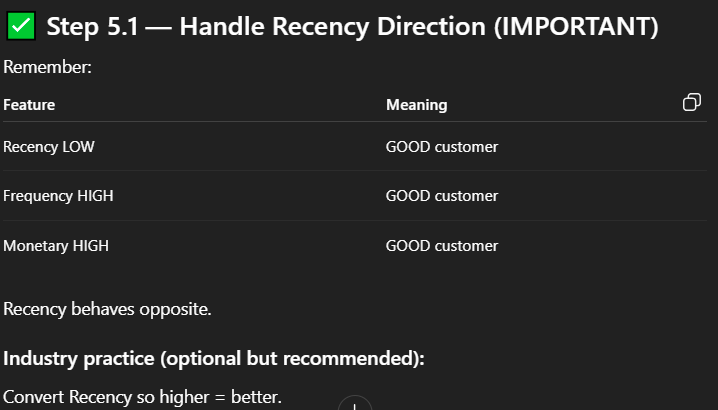

In [ ]:
rfm['Recency'] = rfm['Recency'].max() - rfm['Recency']


# **Scaling**

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(rfm)

# **1️⃣ Elbow Method → structure of data <br>**
# **2️⃣ Silhouette Score → quality of separation**

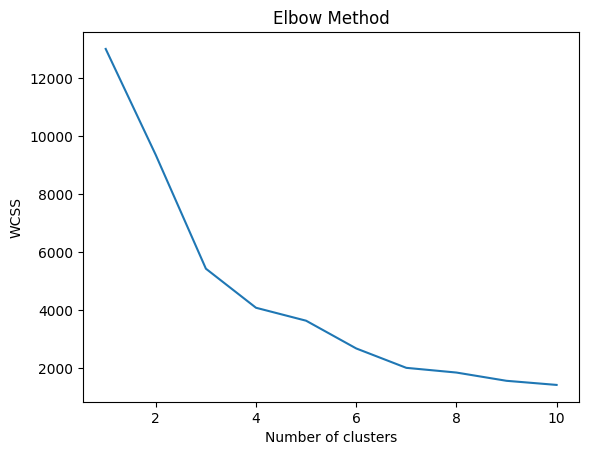

In [ ]:
### Elbow method

from sklearn.cluster import KMeans

wcss = []

for k in range(1,11):
  kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
  kmeans.fit(rfm_scaled)
  wcss.append(kmeans.inertia_)

plt.plot(range(1,11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [ ]:
### Silhouette Score

from sklearn.metrics import silhouette_score

for k in range(2,11):
  kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
  labels = kmeans.fit(rfm_scaled)
  score = silhouette_score(rfm_scaled, kmeans.labels_)
  print(f'K-{k} - Silhouette score : {score}')


K-2 - Silhouette score : 0.5605226055617707
K-3 - Silhouette score : 0.5943372749085692
K-4 - Silhouette score : 0.6161144819517276
K-5 - Silhouette score : 0.4363327695909581
K-6 - Silhouette score : 0.49228837262678976
K-7 - Silhouette score : 0.516179552742716
K-8 - Silhouette score : 0.5169221282516953
K-9 - Silhouette score : 0.49181281350723505
K-10 - Silhouette score : 0.41774847253310987


# **Training Model**

In [ ]:
optimal_cluster = 4
kmeans = KMeans(n_clusters= optimal_cluster, init = 'k-means++', random_state=42)
rfm['Cluster'] = kmeans.fit_predict(rfm_scaled)


In [ ]:
rfm

,Recency,Frequency,Monetary,Cluster
CustomerID,,,,
12346.0,48,1,77183.60,0
12347.0,372,7,4310.00,3
12348.0,299,4,1797.24,3
12349.0,355,1,1757.55,3
12350.0,64,1,334.40,1
...,...,...,...,...
18280.0,96,1,180.60,1
18281.0,193,1,80.82,1
18282.0,366,2,178.05,3


# **Evaluate Model Quality**

In [ ]:
from sklearn.metrics import davies_bouldin_score, calinski_harabasz_score

labels = rfm["Cluster"]

print("Silhouette Score:",
      silhouette_score(rfm_scaled, labels))

print("Davies-Bouldin Index:",
      davies_bouldin_score(rfm_scaled, labels))

print("Calinski-Harabasz Score:",
      calinski_harabasz_score(rfm_scaled, labels))


Silhouette Score: 0.6161144819517276
Davies-Bouldin Index: 0.7524015567669396
Calinski-Harabasz Score: 3149.9947464162683


# **Cluster Profiling**

In [ ]:
Cluster_profile = rfm.groupby('Cluster').mean().round()


In [ ]:
Cluster_profile

,Recency,Frequency,Monetary
Cluster,,,
0,358.0,22.0,12453.0
1,125.0,2.0,478.0
2,367.0,83.0,127338.0
3,330.0,4.0,1350.0


# **Visualization**

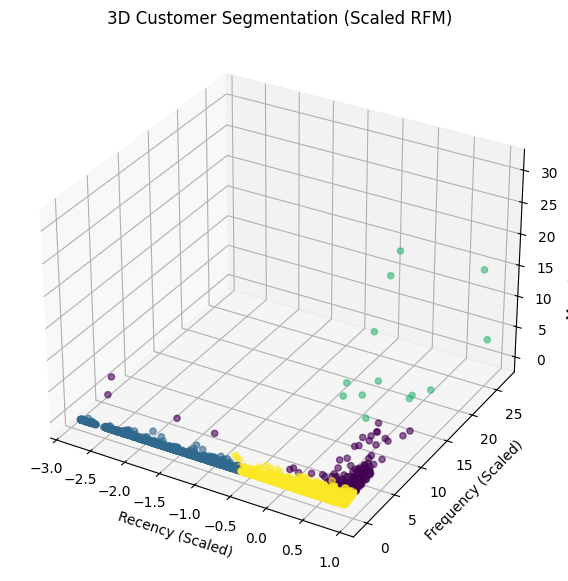

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10,7))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(
    rfm_scaled[:,0],   # Recency
    rfm_scaled[:,1],   # Frequency
    rfm_scaled[:,2],   # Monetary
    c=rfm['Cluster'],
    alpha=0.6
)

ax.set_xlabel('Recency (Scaled)')
ax.set_ylabel('Frequency (Scaled)')
ax.set_zlabel('Monetary (Scaled)')

plt.title("3D Customer Segmentation (Scaled RFM)")
plt.show()


# **FINAL SEGMENTATION**

In [ ]:
segment_map = {
    0: "Loyal Customers",
    1: "New Customers",
    2: "Champions",
    3: "Occasional Buyers"
}

rfm['Segment'] = rfm['Cluster'].map(segment_map)


In [ ]:
rfm

,Recency,Frequency,Monetary,Cluster,Segment
CustomerID,,,,,
12346.0,48,1,77183.60,0,Loyal Customers
12347.0,372,7,4310.00,3,Occasional Buyers
12348.0,299,4,1797.24,3,Occasional Buyers
12349.0,355,1,1757.55,3,Occasional Buyers
12350.0,64,1,334.40,1,New Customers
...,...,...,...,...,...
18280.0,96,1,180.60,1,New Customers
18281.0,193,1,80.82,1,New Customers
18282.0,366,2,178.05,3,Occasional Buyers
